# This notebook contains regression using Neural Network

In [1]:
from data_loader import DataLoader
from neuralnetwork import create_nn_regressor
from configurations import args
from base_regressor_plot import BaseRegressorPlot
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import pandas as pd
from sklearn.metrics import mean_squared_error


import warnings
warnings.filterwarnings('ignore')


## Notes
Read data from data_loader and the cleaning and encoding is that module
The neural_network has the module details

## Read Data
Read split ready to use data

In [2]:
data_loader = DataLoader(args)

In [3]:
# Analysis showed these features are impactful
categorical_features = ['MSSubClass', 'MSZoning', 'LotShape',
                        'LandContour', 'LotConfig', 'LandSlope', 
                        'Neighborhood', 'Condition1', 'Condition2',
                        'BldgType', 'HouseStyle', 'RoofStyle', 'Heating',
                        'HeatingQC']
nominal_features = ['PoolArea', 'YearRemodAdd', 
                    'MasVnrArea', 'YearBuilt', 'KitchenAbvGr',
                     'GrLivArea', 'OverallQual',
                      'BedroomAbvGr', 'TotalBsmtSF', 'LotArea', 
                      'OverallCond',]

## Helper methods

## Model

Before dropping NA (1456, 26)
After dropping NA (1448, 26), dropped 8
Before dropping NA (1448, 26)
removing: PosA 1
removing: PosN 1
removing: RRAn 1
removing: RRAe 1
removing: Shed 1
removing: Floor 1
removing: Po 1
Before dropping NA (1441, 26), dropped 7
Complied new model
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                7296      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________
Training...

plot_predicted_vs_actual
93482.84159577305


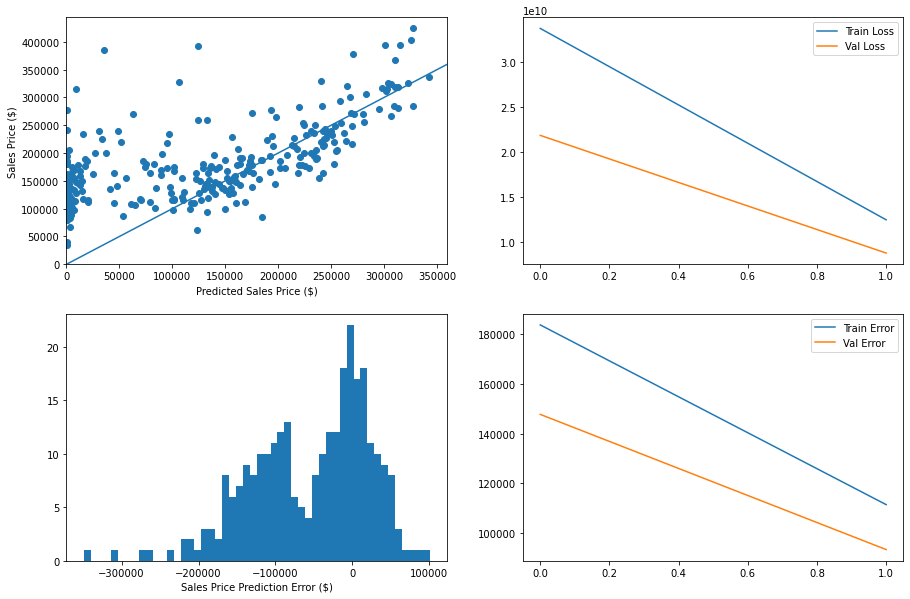

In [24]:
def analyze_neuralnet_regression():
    ''''This method load data and runs the neural net taring and prediction
    
    '''
    # Get clean normized data
    X_train, X_test, y_train, y_test = data_loader.prep_verify_data_for_nn(
        categorical_features, nominal_features)
    regressor = create_nn_regressor(
        X_train, X_test, y_test, epochs=args.num_epochs)
    # model summary as table
    regressor.model.summary()
    regressor.fit(X_train, y_train)
    predicted = regressor.get_predicted(X_test)
    print("\n")
    # plot dignostics
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    BaseRegressorPlot.plot_predicted_vs_actual(axes[0][0], predicted, y_test)
    BaseRegressorPlot.plot_history_loss(
        axes[0][1], regressor,  inlcule_val_loss=True)
    BaseRegressorPlot.plot_error_hist(axes[1][0], predicted, y_test)
    BaseRegressorPlot.plot_rmse(axes[1][1], regressor, inlcule_val_loss=True)
    print(mean_squared_error(y_test, regressor.predict(X_test), squared=False))
    return regressor


nn_regressor = analyze_neuralnet_regression()
